
Q1 Dataset Shape: (11162, 17)
Q1 Columns: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

✅ Q1 Model Accuracy: 0.8463949843260188

📊 Q1 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1175
           1       0.82      0.87      0.84      1058

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233


🔎 Q1 LIME Explanation for 1st test instance:
[('pdays <= -1.00', -0.19543865500701196), ('contact <= 0.00', 0.09914269051365443), ('housing <= 0.00', 0.09793875260630062), ('253.00 < duration <= 492.00', 0.07561133606470741), ('previous <= 0.00', -0.06318398012523682), ('loan <= 0.00', 0.06120759253159246), ('3.00 < month <= 6.00', -0.047

/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

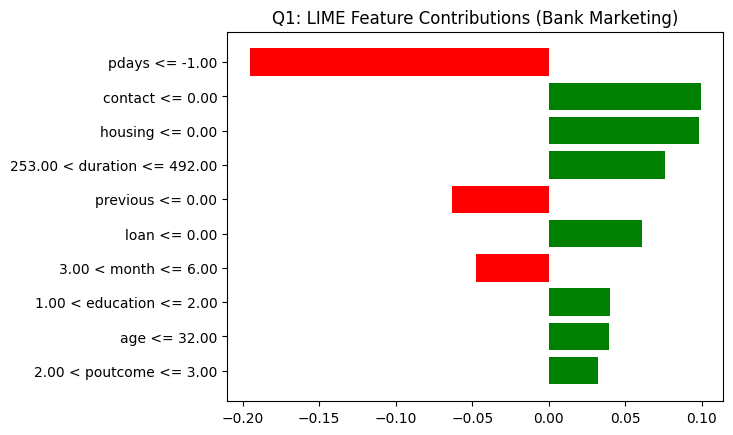

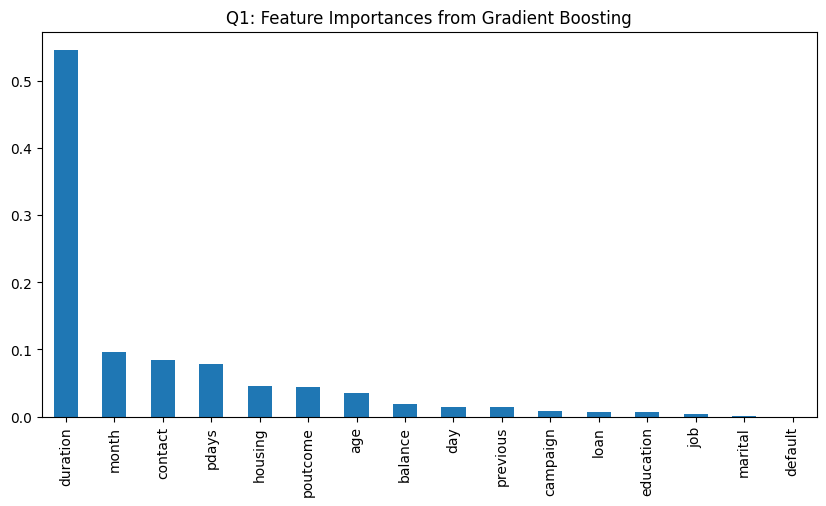


💡 Q1 Top 5 Marketing Insights:
duration    0.546177
month       0.095408
contact     0.083528
pdays       0.078313
housing     0.045519
dtype: float64

Q2 Dataset Shape: (20640, 10)
Q2 Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

✅ Q2 Model Accuracy: 0.8972868217054264

📊 Q2 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      2065
           1       0.90      0.90      0.90      2063

    accuracy                           0.90      4128
   macro avg       0.90      0.90      0.90      4128
weighted avg       0.90      0.90      0.90      4128


🔎 Q2 LIME Explanation for 1st test instance:
[('median_income', 0.12161764173678467), ('longitude', -0.07461387346673388), ('latitude', -0.05588094396271906), ('population', -0.03481028074014056),

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


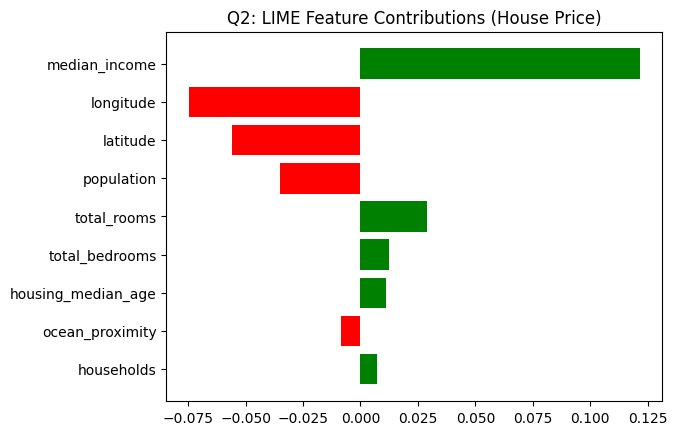

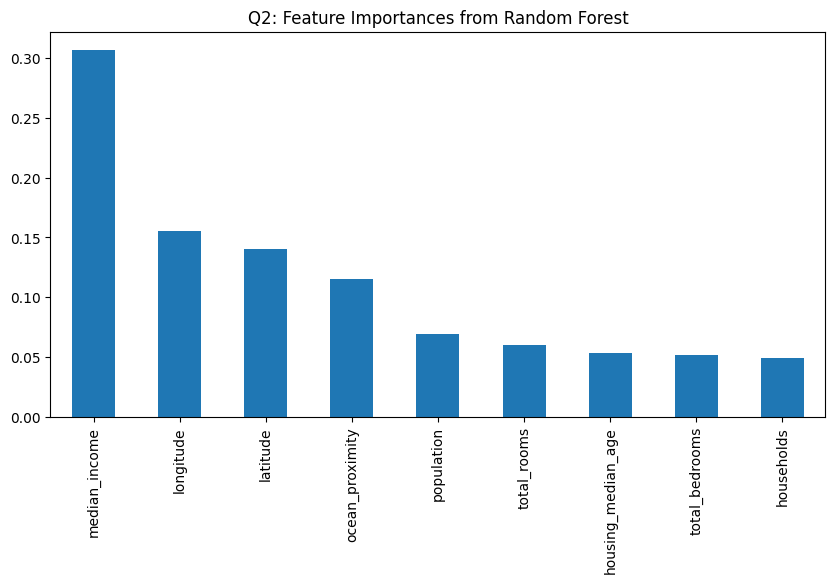


💡 Q2 Top 5 Important Features for House Price Classification:
median_income      0.306840
longitude          0.155312
latitude           0.140474
ocean_proximity    0.114983
population         0.069158
dtype: float64


In [8]:
!pip install lime --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import lime
import lime.lime_tabular
# QUESTION 1: Bank Marketing Campaign
df1 = pd.read_csv("/content/drive/MyDrive/aiml projects/bank.csv")

print("\nQ1 Dataset Shape:", df1.shape)
print("Q1 Columns:", df1.columns)
label_encoders = {}
for col in df1.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

X1 = df1.drop("deposit", axis=1)
y1 = df1["deposit"]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y1
)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X1_train, y1_train)
y1_pred = gb_model.predict(X1_test)
print("\n✅ Q1 Model Accuracy:", accuracy_score(y1_test, y1_pred))
print("\n📊 Q1 Classification Report:\n", classification_report(y1_test, y1_pred))
explainer1 = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X1_train),
    feature_names=X1.columns,
    class_names=['No', 'Yes'],
    discretize_continuous=True,
    mode='classification'
)

j = 0
exp1 = explainer1.explain_instance(
    data_row=X1_test.iloc[j],
    predict_fn=gb_model.predict_proba
)

print("\n🔎 Q1 LIME Explanation for 1st test instance:")
print(exp1.as_list())

fig1 = exp1.as_pyplot_figure()
plt.title("Q1: LIME Feature Contributions (Bank Marketing)")
plt.show()
importances1 = pd.Series(gb_model.feature_importances_, index=X1.columns)
importances1.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Q1: Feature Importances from Gradient Boosting")
plt.show()

print("\n💡 Q1 Top 5 Marketing Insights:")
print(importances1.sort_values(ascending=False).head(5))
# QUESTION 2: House Price Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import lime.lime_tabular
df2 = pd.read_csv("/content/drive/MyDrive/aiml projects/housing.csv")

print("\nQ2 Dataset Shape:", df2.shape)
print("Q2 Columns:", df2.columns)

le = LabelEncoder()
df2["ocean_proximity"] = le.fit_transform(df2["ocean_proximity"])
median_value = df2["median_house_value"].median()
df2["target"] = (df2["median_house_value"] > median_value).astype(int)

X2 = df2.drop(["median_house_value", "target"], axis=1)
y2 = df2["target"]
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X2_train, y2_train)
y2_pred = rf_model.predict(X2_test)
print("\n✅ Q2 Model Accuracy:", accuracy_score(y2_test, y2_pred))
print("\n📊 Q2 Classification Report:\n", classification_report(y2_test, y2_pred))
explainer2 = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X2_train),
    feature_names=X2.columns.tolist(),
    class_names=['Cheap', 'Expensive'],
    mode='classification',
    discretize_continuous=False
)

j = 0
exp2 = explainer2.explain_instance(
    data_row=X2_test.iloc[j].values,
    predict_fn=rf_model.predict_proba
)

print("\n🔎 Q2 LIME Explanation for 1st test instance:")
print(exp2.as_list())

fig2 = exp2.as_pyplot_figure()
plt.title("Q2: LIME Feature Contributions (House Price)")
plt.show()
importances2 = pd.Series(rf_model.feature_importances_, index=X2.columns)
importances2.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Q2: Feature Importances from Random Forest")
plt.show()

print("\n💡 Q2 Top 5 Important Features for House Price Classification:")
print(importances2.sort_values(ascending=False).head(5))





